<h1 align="center"> Exploratory Data Analysis</h1>

In this project, basic statistical queries and analysis were performed using the <a href='https://grouplens.org/datasets/movielens/latest/'>MovieLens Latest Datasets</a>.



`Pandas` `DataFrame`  `Series`  `Seaborn`  `Statistical Data Visualization`   `Matplotlib`

### Ratings

In [19]:
import pandas as pd

ratings = pd.read_csv('ratings.csv', sep=',')
ratings.head() # DataFrame

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [50]:
print(ratings.shape[0], "rows")
print(ratings.shape[-1], "columns")

100836 rows
4 columns


##### Possible ratings using series object:

In [95]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

##### Frequency of each rating:

In [25]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

##### Plotting the above frequency as histogram:

<AxesSubplot:ylabel='Frequency'>

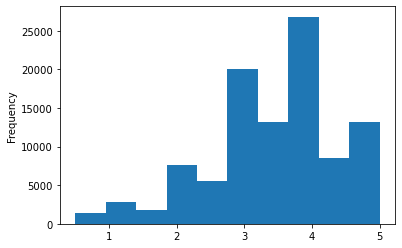

In [31]:
ratings.rating.plot(kind='hist')

In [36]:
print("Mean:",ratings['rating'].mean())
print("Median:",ratings['rating'].median())

Mean: 3.501556983616962
Median: 3.5


##### Or in a simplified way:

In [37]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

##### Visualization as a boxplot:

<AxesSubplot:xlabel='rating'>

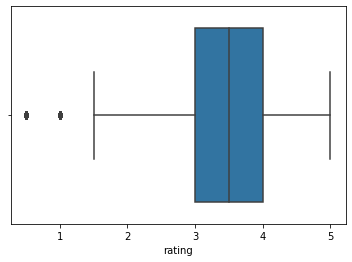

In [40]:
import seaborn as sns

sns.boxplot(ratings.rating)

Conclusion: Half of the given ratings are between 3 and 4

### Movies

In [44]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##### Looking at some specific ratings per movie:

In [57]:
ratings.query("movieId==1").rating.mean()

3.9209302325581397

In [58]:
ratings.query("movieId==2").rating.mean()

3.4318181818181817

##### Grouping DataFrame per movie:

In [68]:
means_per_movie= ratings.groupby("movieId").mean()["rating"]
means_per_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

##### Plotting as histogram and boxplot using seaborn/matplotlib:

<AxesSubplot:xlabel='rating'>

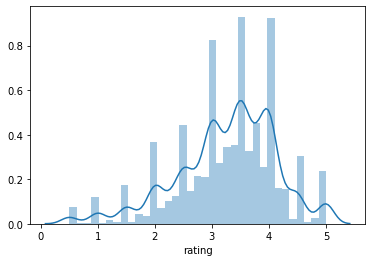

In [94]:
sns.distplot(means_per_movie, bins=35)

<AxesSubplot:title={'center':'Histogram'}, ylabel='rating'>

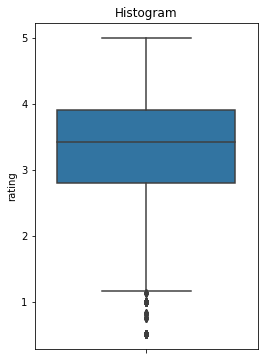

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,6))
plt.title('Mean of rating per movie')
sns.boxplot(y=means_per_movie)